# Implementing Logistic Regression with numpy

In this problem, you will need to write python codes and build logistic regression classifiers on breast cancer dataset to predict whether the cancer is malignant or benign on the patients. The dataset contains 569 samples and 30 features. You may refer to https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic) for more information about the dataset.

Your implementations should include:
- Load data, clean data and partition them into training and testing data.
- Build logistic regression and L2-regularized logistic regression models.
- Implement three gradient descent algorithms for each model: Batch Gradient Descent (GD), Mini-Batch Gradient Descent (MB-SGD) and Stochastic Gradient Descent (SGD).
- Compare the loss curve of three gradient descent algorithms (GD/MB-SGD/SGD).
- Compare logistic regression and regularized version in terms of training and testing error.
- Try to tune different parameters (regularization parameter, learning rate, etc.) to see their effects.

You could use sklearn or any other packages to load and process the data, but you can not directly use the package to train the model.


### Name: ROHAN VINAYAK SAGVEKAR


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [ ]:
import numpy as np
import sklearn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [4]:
data = pd.read_csv("data.csv")

## 1.2 Examine and clean data

In [31]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
data.shape

(569, 31)

In [6]:
le = preprocessing.LabelEncoder()
data = data.drop("id", axis=1)
data = data.drop("Unnamed: 32", axis=1)
le.fit(data.diagnosis)
le.classes_ = le.classes_[::-1]
data.diagnosis = le.transform(data.diagnosis)
data.diagnosis = data["diagnosis"].replace(0, -1)

In [7]:
data['diagnosis'].unique()

array([-1,  1])

In [8]:
data.shape

(569, 31)

In [9]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [10]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:31], data.diagnosis, train_size=0.8, test_size=0.2, random_state=0)


## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [11]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train.values, axis=0).reshape(1, d)
sig = numpy.std(x_train.values, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
radius_mean                0.020907
texture_mean               0.164319
perimeter_mean             0.030981
area_mean                  0.014927
smoothness_mean           -0.019211
compactness_mean           0.101172
concavity_mean             0.084439
concave points_mean        0.029660
symmetry_mean              0.040621
fractal_dimension_mean     0.094946
radius_se                  0.046538
texture_se                 0.064287
perimeter_se               0.100075
area_se                    0.005387
smoothness_se              0.066020
compactness_se             0.118395
concavity_se               0.067615
concave points_se          0.126894
symmetry_se                0.010380
fractal_dimension_se       0.161937
radius_worst               0.013377
texture_worst              0.113419
perimeter_worst            0.033903
area_worst                -0.005170
smoothness_worst          -0.020016
compactness_worst          0.078428
concavity_worst            0.117564
concave points_

In [12]:
train, d = x_train.shape
x_train = np.concatenate((x_train, np.ones((train, 1))), axis=1)
test, d = x_test.shape
x_test = np.concatenate((x_test, np.ones((test, 1))), axis=1)

# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [13]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 vector
#     x: data: n-by-d matrix
#     y: label: n-by-1 vector
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
  yxT = np.multiply(y, x)
  yxTw = np.dot(yxT, w)
  Q = np.mean(np.log(1 + np.exp(-yxTw))) + ((lam / 2) * np.square(np.sum(w)))
  
  return Q

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [14]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
  # print(w.shape, x.shape)
  yxT = np.multiply(y, x)
  yxTw = np.dot(yxT, w)

  g = -np.mean(np.divide(yxT,(1 + np.exp(yxTw))),axis = 0).reshape(x.shape[1],1) + lam * w
  
  return g

In [15]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 vector, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 vector, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, max_epoch=100):
    objvals = np.zeros(max_epoch)

    w = np.zeros((x.shape[1], 1))
    

    y = np.array(y).reshape(x.shape[0],1)
        
    for i in range(max_epoch):
        g = gradient(w, x, y, lam)
        w -= learning_rate * g
        objval = objective(w, x, y, lam)
        objvals[i] = objval
    return w, objvals

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [16]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w, objvals = gradient_descent(x_train, y_train, 0, 0.1,1000)

In [17]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 1E-6
w_reg, objvals_reg = gradient_descent(x_train, y_train, lam, 0.1, 1000)

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [18]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
  yixi = np.multiply(yi,xi)
  yixiw = np.dot(yixi,w)
  a = np.log(1+ np.exp(-yixiw))
  b = (lam/2) * np.sum(np.square(w))
  obj = a + b
  c = -(np.multiply(yi,xi)) / (1+ np.exp(yixiw)) 
  d = (lam * w).reshape(xi.shape[0])
  g = c + d
  # print(g.shape)
  return obj, g

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [19]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, max_epoch=100):
  objvals = [0] * max_epoch
  # print(y.shape)
  w = np.zeros((x.shape[1],1)) 
  
  y = np.array(y).reshape((x.shape[0], 1))

  for i in range(max_epoch):
    random_samples = np.random.permutation(x.shape[0])
    x_rand_samples = x[random_samples,: ]
    y_rand_samples = y[random_samples,:]

    objval = 0
    for j in range(x.shape[0]):
      xi = x_rand_samples[j,:]
      # print(xi.shape)
      yi = float(y_rand_samples[j,:])
      obj, g = stochastic_objective_gradient(w, xi, yi, lam)
      objval += obj
      w-= (learning_rate * g.reshape((x.shape[1],1)))     
    objval /= x.shape[0]
    objvals[i] = objval

  return w, objvals

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [20]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_sgd, objvals_sgd = sgd(x_train, y_train, 0, 0.1, 1000)

/var/folders/5z/tydj9k6x4g38k9j567rqwh300000gn/T/ipykernel_3458/596008057.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yi = float(y_rand_samples[j,:])


In [21]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_sgd_reg, objvals_sgd_reg = gradient_descent(x_train, y_train, lam, 0.1, 1000)

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [22]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
  yixi = np.multiply(yi,xi)
  yixiw = np.dot(yixi,w)
  obj = np.mean(np.log(1 + np.exp(-yixiw))) + (lam / 2) * np.sum(np.square(w))

  g = np.mean(np.divide(-yixi , (1 + np.exp(yixiw))),axis = 0).reshape(xi.shape[1],1) + lam * w

  return obj, g

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [23]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate,batch_size,max_epoch=100):
  objvals = [0] * max_epoch
  b = 20
  # print(y.shape)
  w = np.zeros((x_train.shape[1], 1))
  
  y = np.array(y).reshape((x.shape[0], 1))

  for i in range(max_epoch):
    random_samples = np.random.permutation(x.shape[0])
    x_rand_samples = x[random_samples,: ]
    y_rand_samples = y[random_samples,:]

    objval = 0
    for k in range(x.shape[0] // b):
      xBatch = x_rand_samples[k * b: k * b + b]
      # print(x.shape)
      yBatch = y_rand_samples[k * b: k * b + b]
      obj, g = mb_objective_gradient(w, xBatch, yBatch, lam)
      objval += obj
      temp = np.multiply(learning_rate, g)
      w -= temp
    
    objval /= b
    objvals[i] = objval

  return w, objvals


Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [24]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_mbgd, objvals_mbgd = mbgd(x_train, y_train, 0, 0.1, 50, 1000)

In [25]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w_mbgd_reg, objvals_mbgd_reg = mbgd(x_train, y_train, 1E-6, 0.1, 50, 1000)

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

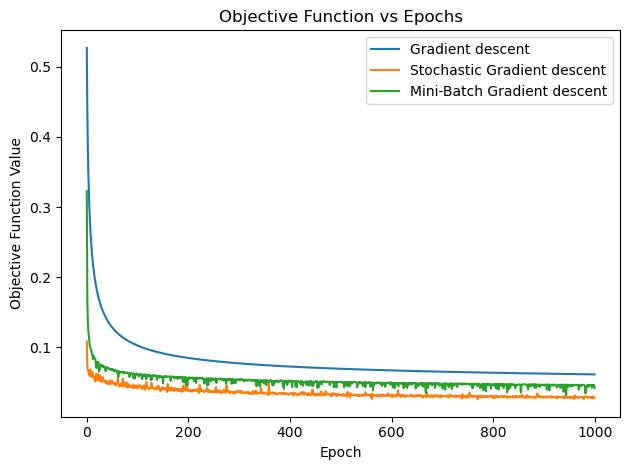

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


epochs_gd = range(len(objvals))
epochs_sgd = range(len(objvals_sgd))
epochs_mbgd = range(len(objvals_mbgd))

l1, = plt.plot(epochs_gd, objvals)
l2, = plt.plot(epochs_sgd, objvals_sgd)
l3, = plt.plot(epochs_mbgd, objvals_mbgd)
plt.title("Objective Function vs Epochs")
plt.xlabel('Epoch')
plt.ylabel('Objective Function Value')
plt.legend([l1, l2, l3], ['Gradient descent', 'Stochastic Gradient descent', 'Mini-Batch Gradient descent'])
plt.tight_layout()

plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [28]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    xw = (np.dot(X, w))
    f = np.array([1 if i > 0 else -1 for i in xw])
    return f

In [29]:
# evaluate training error of logistric regression and regularized version
predict_train = predict(w, x_train)
error = np.mean(np.abs(predict_train - y_train) / 2)
print("Accuracy for GD is: " + str(1 - error))
# GD regularized
predict_train_reg = predict(w_reg, x_train)
error_reg = np.mean(np.abs(predict_train_reg - y_train) / 2)
print("Accuracy for GD regularized is: " + str(1 - error_reg))
# SGD
predict_train_sgd = predict(w_sgd, x_train)
error_sgd = np.mean(np.abs(predict_train_sgd - y_train) / 2)
print("Accuracy for SGD is: " + str(1 - error_sgd))
# SGD regularized
predict_train_sgd_reg = predict(w_sgd_reg, x_train)
error_sgd_reg = np.mean(np.abs(predict_train_sgd_reg - y_train) / 2)
print("Accuracy for SGD regularized is: " + str(1 - error_sgd_reg))
# MBGD
predict_train_mbgd = predict(w_mbgd, x_train)
error_mbgd = np.mean(np.abs(predict_train_sgd - y_train) / 2)
print("Accuracy for MBGD is: " + str(1 - error_mbgd))
# MBGD regularized
predict_train_mbgd_reg = predict(w_mbgd_reg, x_train)
error_mbgd_reg = np.mean(np.abs(predict_train_mbgd_reg - y_train) / 2)
print("Accuracy for MBGD regularized is: " + str(1 - error_mbgd_reg))

Accuracy for GD is: 0.989010989010989
Accuracy for GD regularized is: 0.989010989010989
Accuracy for SGD is: 0.9868131868131869
Accuracy for SGD regularized is: 0.989010989010989
Accuracy for MBGD is: 0.9868131868131869
Accuracy for MBGD regularized is: 0.9868131868131869


In [30]:
# evaluate testing error of logistric regression and regularized version
predict_test = predict(w, x_test)
error = np.mean(np.abs(predict_test - y_test) / 2)
print("Accuracy for GD is: " + str(1 - error))
# GD regularized
predict_test_reg = predict(w_reg, x_test)
error = np.mean(np.abs(predict_test_reg - y_test) / 2)
print("Accuracy for GD regularized is: " + str(1 - error))
# SGD
predict_test_sgd = predict(w_sgd, x_test)
error = np.mean(np.abs(predict_test_sgd - y_test) / 2)
print("Accuracy for SGD is: " + str(1 - error))
# SGD regularized
predict_test_sgd_reg = predict(w_sgd_reg, x_test)
error = np.mean(np.abs(predict_test_sgd_reg - y_test) / 2)
print("Accuracy for SGD regularized is: " + str(1 - error))
# MBGD
predict_test_mbgd = predict(w_mbgd, x_test)
error = np.mean(np.abs(predict_test_sgd - y_test) / 2)
print("Accuracy for MBGD is: " + str(1 - error))
# MBGD regularized
predict_test_mbgd_reg = predict(w_mbgd_reg, x_test)
error = np.mean(np.abs(predict_test_mbgd_reg - y_test) / 2)
print("Accuracy for MBGD regularized is: " + str(1 - error))

Accuracy for GD is: 0.9649122807017544
Accuracy for GD regularized is: 0.9649122807017544
Accuracy for SGD is: 0.9473684210526316
Accuracy for SGD regularized is: 0.9649122807017544
Accuracy for MBGD is: 0.9473684210526316
Accuracy for MBGD regularized is: 0.956140350877193


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model.

In [41]:
# load Dataset
df = pd.read_csv("data.csv")

# preprocess Data
df = df.drop(["id", "Unnamed: 32"], axis=1)
df["diagnosis"] = np.where(df["diagnosis"] == "B", 1, -1)

# split Data
x = df.drop("diagnosis", axis=1).values
y = df["diagnosis"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# normalize Data
mu = np.mean(x_train, axis=0)
sig = np.std(x_train, axis=0)
x_train = (x_train - mu) / (sig + 1e-6)
x_test = (x_test - mu) / (sig + 1e-6)

# define Mini-Batch Gradient Descent
def mb_objective_gradient(w, xi, yi, lam):
    b, d = xi.shape
    scores = np.matmul(xi, w)
    obj = (1 / b) * np.sum(np.log(1 + np.exp(-yi * scores))) + (lam / 2) * np.linalg.norm(w) ** 2
    exp_term = np.exp(yi * scores)
    grad_term = (-yi * xi) / (1 + exp_term)
    g = (1 / b) * np.sum(grad_term, axis=0, keepdims=True).T + lam * w
    return obj, g

def mbgd(x, y, lam, learning_rate, w, batch_size, max_epoch=100):
    n, d = x.shape
    objvals = []
    for epoch in range(max_epoch):
        indices = np.random.permutation(n)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        for i in range(0, n, batch_size):
            xi = x_shuffled[i:i + batch_size, :]
            yi = y_shuffled[i:i + batch_size].reshape(-1, 1)
            obj, g = mb_objective_gradient(w, xi, yi, lam)
            w = w - learning_rate * g
        full_obj, _ = mb_objective_gradient(w, x, y, lam)
        objvals.append(full_obj)
    return w, objvals

# define Prediction Function
def predict(w, X):
    y_pred = np.dot(X, w)
    return np.where(y_pred >= 0, 1, -1)

# hyperparameter Grid Search
learning_rates = [0.0001, 0.001, 0.01, 0.1]
regularization_params = [0, 0.0001, 0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64, 128]
epochs = 100

best_params = {"learning_rate": None, "regularization": None, "batch_size": None}
best_accuracy = 0
results = []

for lr in learning_rates:
    for lam in regularization_params:
        for batch_size in batch_sizes:
            # initialize weights
            d = x_train.shape[1]
            w_mini_sgd = np.random.rand(d, 1)

            # train Model
            optimal_w, _ = mbgd(x_train, y_train.reshape(-1, 1), lam, lr, w_mini_sgd, batch_size, max_epoch=epochs)

            # evaluate on Test Set
            test_preds = predict(optimal_w, x_test).flatten()
            test_accuracy = np.mean(test_preds == y_test.flatten()) * 100

            # store Results
            results.append((lr, lam, batch_size, test_accuracy))

            # update Best Parameters
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_params["learning_rate"] = lr
                best_params["regularization"] = lam
                best_params["batch_size"] = batch_size

# convert results to DataFrame and sort by accuracy
df_results = pd.DataFrame(results, columns=["Learning Rate", "Regularization", "Batch Size", "Test Accuracy"])
df_results = df_results.sort_values(by="Test Accuracy", ascending=False)

# display Results
# instead of using ace_tools, we will use display from IPython.display
# this assumes you have already imported display earlier in your notebook
display(df_results)

# print Best Parameters
print("Best Parameters:")
print(best_params)

,Learning Rate,Regularization,Batch Size,Test Accuracy
62,0.1000,0.0000,64,99.122807
40,0.0100,0.0000,16,98.245614
68,0.1000,0.0010,16,98.245614
44,0.0100,0.0001,16,98.245614
46,0.0100,0.0001,64,98.245614
...,...,...,...,...
8,0.0001,0.0010,16,6.140351
5,0.0001,0.0001,32,6.140351
4,0.0001,0.0001,16,6.140351
39,0.0010,0.1000,128,5.263158


Best Parameters:
{'learning_rate': 0.1, 'regularization': 0, 'batch_size': 64}
